# Notebook to analyse the demographic and clinical information from the cohort

This notebook is used to create Table 1 of the manuscript

In [ ]:
import os
import numpy as np
import pandas as pd
from aidhs.paths import BASE_PATH



Load the subjects included in the indepandante validation

In [2]:
folder = '/home/mathilde/Documents/projects/surHippo/processes/240404_AID-HS_independantsite/aidhs_data_folder'

In [3]:
# get list of subjects

independant_dataset = '3T'

sites = ['H10','H21','H102','H2','H115', 'H45','H28', 'H5', 'H47', 'H101', 'H14', 'H103', 'H108', 'H104', 'H19'] 
print(len(sites)) 

#load subjects list
subjects = []
for site in sites:
    subjects_file  = os.path.join(folder, f'list_subjects_{site}.csv')
    subjects_site = pd.read_csv(subjects_file)['ID'].values
    subjects.extend(subjects_site)
len(subjects)


15


441

In [4]:
## remove outliers from QC
print(len(subjects))
subjects_excluded  = pd.read_csv('/home/mathilde/Documents/projects/surHippo/processes/240404_AID-HS_independantsite/aidhs_data_folder/subjects_discarded_QC.csv')
subjects_excluded = subjects_excluded[subjects_excluded['discard']==1]['ID'].values
print(subjects_excluded)

subjects = [subject for subject in subjects if not subject in subjects_excluded]
print(len(subjects))

441
['MELD_H10_P_0053' 'MELD_H21_P_0056' 'MELD_H21_P_0064' 'MELD_H21_P_0073'
 'MELD_H2_P_0002']
436


In [5]:
#get demographic information
csv_file = os.path.join(folder,'demographics_file.csv')
df_demos = pd.read_csv(csv_file)
df_demos.head()

,ID,Site,Scanner,"Patient or Control (Patient = 1, Control = 0)",Age at preoperative,"Sex (Female = 1, Male = 0)"
0,MELD_H2_P_0002,noHarmo,3T,1,13.0,1
1,MELD_H2_P_0024,noHarmo,3T,1,4.5,0
2,MELD_H2_P_0035,noHarmo,3T,1,16.3,1
3,MELD_H2_C_0002,noHarmo,3T,0,9.3,1
4,MELD_H2_C_0003,noHarmo,3T,0,7.6,0


In [6]:
# load csv with more information
import glob

df_info = pd.DataFrame()
for site in sites:
    info_file = glob.glob(os.path.join(folder,f'MELD_participants_infos_{site}_*.csv'))[0]

    df_info_site = pd.read_csv(info_file)
    df_info = pd.concat([df_info,df_info_site])
df_info.head()

,Unnamed: 0,id,old_id,included,reason exlusion,redcap_data_access_group,site,patient_control,sex,radiology,...,hemi,reason exclusion,reason_exclusion,field_strengths___unk,field_strengths___na,postop_t1_yr_2___unk,postop_t1_yr_2___na,Unnamed: 1,notes,Unnamed: 55
0,1.0,MELD_H10_P_0001,RMKFDO,1,NaN,NaN,H10,1.0,0.0,1.0,...,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,MELD_H10_P_0002,ARM,1,NaN,NaN,H10,1.0,1.0,8.0,...,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,MELD_H10_P_0003,ELR,1,NaN,NaN,H10,1.0,0.0,8.0,...,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,MELD_H10_P_0004,AAO,1,NaN,NaN,H10,1.0,1.0,10.0,...,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,MELD_H10_P_0005,ADT,1,NaN,NaN,H10,1.0,1.0,10.0,...,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create a dataframe with the demographic information for each subject of the dataset

In [7]:
df=pd.DataFrame()
for subject in subjects : 
    # print(subject)
    row=df_demos[df_demos['ID']==subject]
    values={}
    values['ID']=subject
    values['site']=df_info[df_info['id']==subject]['site'].values[0]
    patient_control=df_demos[df_demos['ID']==subject]['Patient or Control (Patient = 1, Control = 0)'].values[0]
    if (patient_control==1):
        values['group']='P'
    elif (patient_control==0)&('_P_' in subject):
        values['group']='DC'
    elif (patient_control==0)&('_C_' in subject):
        values['group']='C'
    else:
        print('problem')
        values['group'] = np.nan
    values['sex'] = df_info[df_info['id']==subject]['sex'].values[0]
    if independant_dataset == '15T':
        values['age_scan'] = df_info[df_info['id']==subject]['age_at_preop_t1_15t'].values[0]
    else:
        values['age_scan'] = df_info[df_info['id']==subject]['age_at_preop_t1_3t'].values[0]
    values['lesional_hemi'] = df_info[df_info['id']==subject]['hemi'].values[0]
    
    values['mri_neg'] = df_info[df_info['id']==subject]['mri_negative'].values[0]
    values['age_onset'] = df_info[df_info['id']==subject]['age_at_onset'].values[0]
    values['seizure_free'] = df_info[df_info['id']==subject]['seizure_free'].values[0]
    df2 = pd.DataFrame([values])
    df = pd.concat([df, df2], ignore_index=True)

In [9]:
df.head()

,ID,site,group,sex,age_scan,lesional_hemi,mri_neg,age_onset,seizure_free
0,MELD_H10_P_0004,H10,P,1.0,35.0,L,0.0,2.0,1.0
1,MELD_H10_P_0005,H10,P,1.0,26.0,L,0.0,1.0,2.0
2,MELD_H10_P_0006,H10,P,1.0,34.0,R,0.0,4.0,1.0
3,MELD_H10_P_0007,H10,P,0.0,48.0,R,0.0,2.0,2.0
4,MELD_H10_P_0008,H10,P,1.0,41.0,L,0.0,25.0,1.0


In [13]:
#add image resolution
# add image resolution
import glob
import nibabel as nb
import shutil


t1_folder= '/home/mathilde/Documents/projects/surHippo/processes/240404_AID-HS_independantsite/aidhs_data_folder/input'

voxel_size_x = []
voxel_size_y = []
voxel_size_z = []
isotropic = []
resolution_slice= []
resolution_plan= []
for i,row in df.iterrows():
    # print(id)
    bids_id = 'sub-'+ ''.join((row['ID']).split('_'))
    nifti_t1 = glob.glob(os.path.join(t1_folder, bids_id, 'anat', '*T1*.nii*'))[0]
    im = nb.load(nifti_t1)
    voxel_sizes = im.header.get_zooms()
    voxel_size_x.append(voxel_sizes[0])
    voxel_size_y.append(voxel_sizes[1])
    voxel_size_z.append(voxel_sizes[2])
    #categorise
    min_size = min(voxel_sizes)
    max_size = max(voxel_sizes)
    if ((abs(voxel_sizes-min_size) < 0.0001).sum() >= 2):
        resolution_plan.append(min_size)
        resolution_slice.append(max_size)
    else:
        resolution_plan.append(max_size)
        resolution_slice.append(min_size)
    if ((abs(voxel_sizes-min_size) < 0.1).sum() == 3) | ((abs(voxel_sizes-max_size) < 0.1).sum() == 3):
        isotropic.append(True)
    else:
        isotropic.append(False)
      
df['voxel_size_x']=voxel_size_x
df['voxel_size_y']=voxel_size_y
df['voxel_size_z']=voxel_size_z
df['isotropic']=isotropic
df['resolution slice']=resolution_slice
df['resolution plan']=resolution_plan

### Analyse cohort 

Analyse per group

In [14]:
df.groupby(['group'])['ID'].count()

group
C      80
DC     81
P     275
Name: ID, dtype: int64

In [15]:
df.groupby(['group', 'site',])['ID'].count()

group  site
C      H10      20
       H103     20
       H108     20
       H2       20
DC     H101     20
       H102     20
       H104      4
       H14      20
       H21      17
P      H10      53
       H102      6
       H103      5
       H108      1
       H115      3
       H19      18
       H2        2
       H21       3
       H28       2
       H45       2
       H47      31
       H5      149
Name: ID, dtype: int64

Analyse the sex [ 0 male : 1 female]

In [16]:
df.groupby(['group', 'sex'])['ID'].count()

group  sex
C      0.0     35
       1.0     45
DC     0.0     53
       1.0     28
P      0.0    109
       1.0    166
Name: ID, dtype: int64

In [17]:
# chi square stats on sex
from scipy.stats import chisquare

m = np.array([[38,46,77],[83,44,77]])   # C - DC - P , M - F

count_group = m.sum(axis=0)   
count_sex = m.sum(axis=1)
tot = m.sum()


Emc  =  (count_group[0]*count_sex[0])/tot
Emdc =  (count_group[1]*count_sex[0])/tot
Emp  =  (count_group[2]*count_sex[0])/tot

Efc  =  (count_group[0]*count_sex[1])/tot
Efdc =  (count_group[1]*count_sex[1])/tot
Efp  =  (count_group[2]*count_sex[1])/tot

f_obs = m.flatten()
f_exp = np.array([Emc, Emdc, Emp, Efc, Efdc, Efp])

chisquare(f_obs=f_obs, f_exp=f_exp, ddof=2)

Power_divergenceResult(statistic=11.879095521707708, pvalue=0.03648253755158471)

Analyse per age

In [18]:
df.groupby(['group'])['age_scan'].quantile([0.25,0.5,0.75])

group      
C      0.25    13.575
       0.50    25.500
       0.75    35.000
DC     0.25     7.750
       0.50    15.310
       0.75    27.500
P      0.25    27.000
       0.50    35.500
       0.75    47.000
Name: age_scan, dtype: float64

In [21]:
# df.groupby(['group'])['age_scan'].quantile([0,0.5,1])

Text(0, 0.5, 'number')

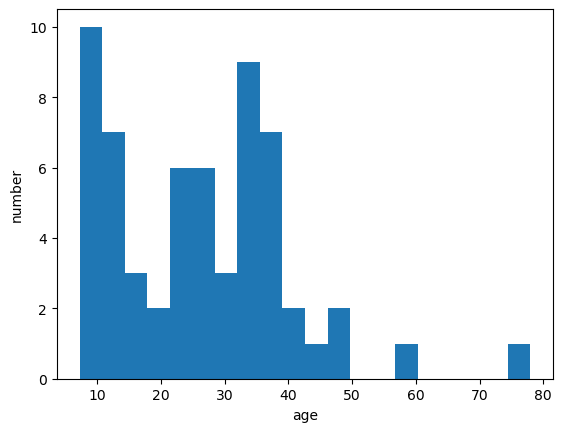

In [22]:
import matplotlib.pyplot as plt
age_controls = df[df['group']=='C']['age_scan'].values

plt.hist(age_controls, bins=20)
plt.xlabel('age')
plt.ylabel('number')


In [23]:
#categorise between children and adults

df['adult_child']=['child' if x<18 else 'adult' for x in df['age_scan']]
df.groupby(['adult_child'])['ID'].count()


adult_child
adult    354
child     82
Name: ID, dtype: int64

Analyse mri status (0 MRI negative , 1 MRI positive)

In [24]:
df.groupby(['group', 'mri_neg'])['ID'].count()

group  mri_neg
DC     0.0         58
       1.0         23
P      0.0        254
       1.0         14
Name: ID, dtype: int64

In [25]:
14/268

0.05223880597014925

In [26]:
df.groupby(['group'])['age_onset'].quantile([0.25,0.5,0.75])

group      
C      0.25      NaN
       0.50      NaN
       0.75      NaN
DC     0.25     2.50
       0.50     5.00
       0.75    10.00
P      0.25     4.75
       0.50    10.00
       0.75    17.00
Name: age_onset, dtype: float64

In [27]:
df.groupby(['group', 'seizure_free'])['ID'].count()

group  seizure_free
DC     1.0              70
       2.0              11
P      1.0             167
       2.0             100
       555.0             1
Name: ID, dtype: int64

In [28]:
167/267

0.6254681647940075

##### Analyse T1w scan resolution

In [16]:
df.groupby(['isotropic'])['ID'].count()

isotropic
False    177
True     259
Name: ID, dtype: int64

In [19]:
259/436

0.5940366972477065

In [17]:
df[['resolution plan', 'resolution slice']].quantile([0,0.5,1])

,resolution plan,resolution slice
0.0,0.3906,0.410200
0.5,0.9375,1.000000
1.0,1.0547,3.000199
